# Ecological Analyses

In [1]:
# Import packages.
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import scipy.stats as stats

# Intialize pandas display options.
pd.set_option("display.max_columns", None)
# Intialize the matplolib styling.
plt.rcParams.update(
    {
        "figure.constrained_layout.use": True,
        "figure.facecolor": "white",
        "axes.spines.top": False,
        "axes.spines.right": False,
        "legend.frameon": False,
    }
)

## Phenology  

In [45]:
# Load the phenology data into a Pandas dataframe.
phenology_long_df = pd.read_csv("../data/phenology_data.csv")
# Create the date column.
phenology_long_df["date"] = (
    phenology_long_df["month"] + "-" + phenology_long_df["year"].apply(str)
)
# Initialize a data array.
date_array = np.array(
    [
        "JAN-2018",
        "FEB-2018",
        "MAR-2018",
        "APR-2018",
        "MAY-2018",
        "JUN-2018",
        "JUL-2018",
        "AUG-2018",
        "SEP-2018",
        "OCT-2018",
        "NOV-2018",
        "DEC-2018",
        "JAN-2019",
        "FEB-2019",
        "MAR-2019",
        "APR-2019",
        "MAY-2019",
        "JUN-2019",
        "JUL-2019",
        "AUG-2019",
        "SEP-2019",
        "OCT-2019",
        "NOV-2019",
        "DEC-2019",
        "JAN-2020",
        "FEB-2020",
        "MAR-2020",
    ]
)
# Make the date column ordered.
phenology_long_df["date"] = pd.Categorical(
    phenology_long_df["date"],
    date_array,
    ordered=True,
)
# Visually inspect the phenology data.
phenology_long_df

,species,month,year,count,type,date
0,Ficus clamydocarpa fernandesiana,JAN,2018,5,Fruit,JAN-2018
1,Ficus kamerounesis,JAN,2018,0,Fruit,JAN-2018
2,Ficus mucoso,JAN,2018,1,Fruit,JAN-2018
3,Sapium ellipticum,JAN,2018,3,Fruit,JAN-2018
4,Croton stelluifer,JAN,2018,13,Fruit,JAN-2018
...,...,...,...,...,...,...
481,D. yakuba_Obo,MAR,2020,31,Drosophila,MAR-2020
482,D. santomea_BS,MAR,2020,7,Drosophila,MAR-2020
483,F1_BS,MAR,2020,0,Drosophila,MAR-2020
484,D. yakuba_BS,MAR,2020,22,Drosophila,MAR-2020


In [9]:
phenology_long_df.species.unique()

array(['Ficus clamydocarpa fernandesiana', 'Ficus kamerounesis',
       'Ficus mucoso', 'Sapium ellipticum', 'Croton stelluifer',
       'Homalium henriquesii', 'Psydrax subcordata', 'Psydrax acutiflora',
       'Antidesma vogelianum', 'Sabicea ingrata ingrata',
       'Psidium guajava', 'D. santomea_Obo', 'F1_Obo', 'D. yakuba_Obo',
       'D. santomea_BS', 'F1_BS', 'D. yakuba_BS', 'D. yakuba_MC'],
      dtype=object)

In [29]:
# Initialize drosophila species lists.
san_list = ["D. santomea_Obo", "D. santomea_BS"]
yak_list = ["D. yakuba_Obo", "D. yakuba_BS"]
hybrid_list = ["F1_Obo", "F1_BS"]
dros_list = ["D. santomea", "D. yakuba", "F1 Hybrid"]
fruit_list = [
    "Ficus clamydocarpa fernandesiana",
    "Ficus kamerounesis",
    "Ficus mucoso",
    "Sapium ellipticum",
    "Croton stelluifer",
    "Homalium henriquesii",
    "Psydrax subcordata",
    "Psydrax acutiflora",
    "Antidesma vogelianum",
    "Sabicea ingrata ingrata",
    "Psidium guajava",
]
# Initialize a relative abundance dictionary.
abundance_dicc = {}
# Fill the drosophila species.
abundance_dicc["D. santomea"] = (
    phenology_long_df[phenology_long_df.species.isin(san_list)]
    .groupby(["date"])["count"]
    .mean()
    .values
)
abundance_dicc["D. yakuba"] = (
    phenology_long_df[phenology_long_df.species.isin(yak_list)]
    .groupby(["date"])["count"]
    .mean()
    .values
)
abundance_dicc["F1 Hybrid"] = (
    phenology_long_df[phenology_long_df.species.isin(hybrid_list)]
    .groupby(["date"])["count"]
    .mean()
    .values
)
# For every fruit species.
for fruit in fruit_list:
    # Fill the fruit species.
    abundance_dicc[fruit] = phenology_long_df[phenology_long_df.species == fruit][
        "count"
    ].values

In [30]:
# Initialize a correlation matrix.
corr_mat = np.empty((len(dros_list), len(fruit_list)))
pval_mat = np.empty((len(dros_list), len(fruit_list)))
# For every drosophila species.
for i, dros in enumerate(dros_list):
    # For every fruit species.
    for j, fruit in enumerate(fruit_list):
        # Calculate the correlation.
        corr_mat[i, j], pval_mat[i, j] = stats.spearmanr(
            abundance_dicc[dros], abundance_dicc[fruit]
        )

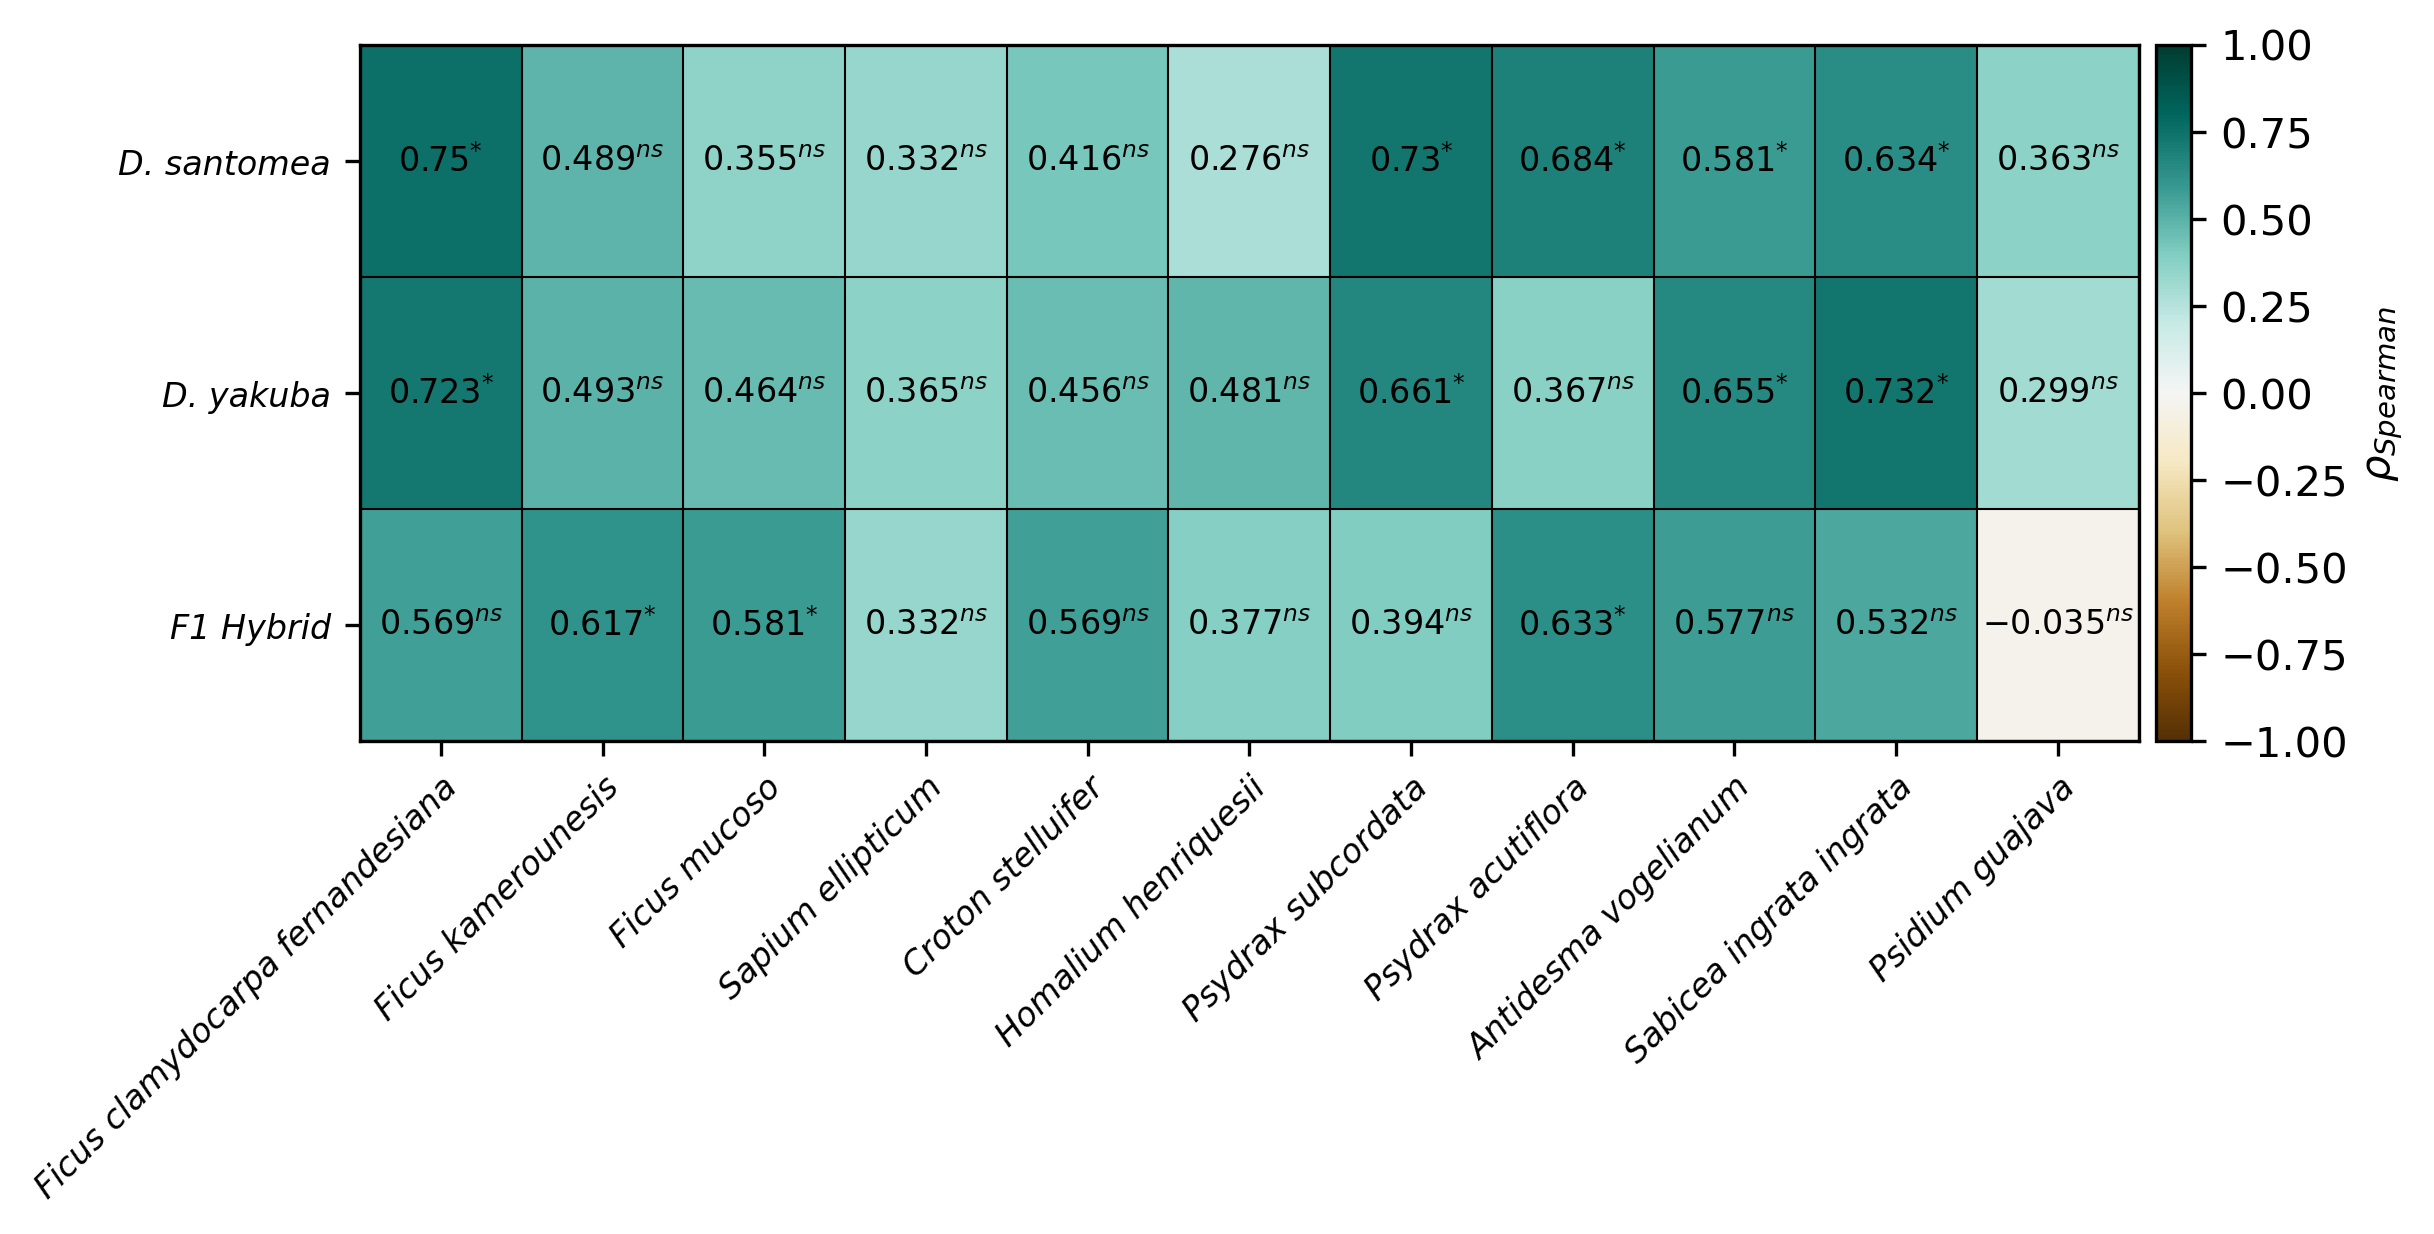

In [42]:
# Intialize the figure and axes.
fig = plt.figure(
    figsize=(8, 4),
    facecolor="white",
    constrained_layout=True,
    dpi=300,
)
ax = fig.add_subplot(111)
# Plot the heatmap.
im = ax.imshow(
    corr_mat,
    vmin=-1,
    vmax=1,
    aspect="auto",
    cmap="BrBG",
)
# Intialize the positions for the colobar.
cbar = fig.colorbar(
    im,
    ax=ax,
    pad=0.01,
    label=r"$\rho_{Spearman}$",
)
# Seperate each box.
ax.set_xticks(np.arange(0, corr_mat.shape[1], 1))
ax.set_yticks(np.arange(0, corr_mat.shape[0], 1))
ax.set_xticks(
    np.arange(-0.5, corr_mat.shape[1], 1),
    minor=True,
)
ax.set_yticks(
    np.arange(-0.5, corr_mat.shape[0], 1),
    minor=True,
)
ax.grid(
    which="minor",
    color="black",
    linestyle="-",
    linewidth=0.5,
)
# For every row in the subplot.
for y in range(len(dros_list)):
    # For every column in the subplot.
    for x in range(len(fruit_list)):
        # If the p-value is significant.
        if pval_mat[y, x] < (0.05 / pval_mat.size):
            # Annotate the significant correlation coefficient.
            ax.text(
                x,
                y,
                r"$" + str(round(corr_mat[y, x], 3)) + "^{*}$",
                ha="center",
                va="center",
                color="black",
                fontsize=8,
            )
        # Else the correlation coefficient is not significant.
        else:
            # Annotate the insignificant correlation coefficient.
            ax.text(
                x,
                y,
                r"$" + str(round(corr_mat[y, x], 3)) + "^{ns}$",
                ha="center",
                va="center",
                color="black",
                fontsize=8,
            )
# Set the x and y ticks for each plot.
ax.set_yticks(
    np.arange(corr_mat.shape[0]),
    labels=dros_list,
    fontsize=8,
    fontstyle="italic",
)
ax.set_xticks(
    np.arange(corr_mat.shape[1]),
    labels=fruit_list,
    fontsize=8,
    fontstyle="italic",
    rotation=45,
    ha="right",
    rotation_mode="anchor",
)
# Remove the minor ticks.
ax.tick_params(
    which="minor",
    left=False,
    bottom=False,
    labelbottom=False,
)
# Respine the axes.
ax.spines["top"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(True)
# Show the plot.
plt.show()

In [79]:
# Initialize the fruiting months for the endemic fig.
fig_fruiting_periods = np.array(
    [
        "FEB-2018",
        "MAR-2018",
        "APR-2018",
        "MAY-2018",
        "JUN-2018",
        "OCT-2018",
        "NOV-2018",
        "DEC-2018",
        "FEB-2019",
        "MAR-2019",
        "APR-2019",
        "MAY-2019",
        "JUN-2019",
        "OCT-2019",
        "NOV-2019",
        "DEC-2019",
        "FEB-2020",
        "MAR-2020",
    ]
)
# Perform an anova for san abundance during the endemic fig's fruiting season.
fruiting_period_f, fruiting_period_p = stats.f_oneway(
    abundance_dicc["D. santomea"][np.isin(date_array, fig_fruiting_periods)],
    abundance_dicc["D. santomea"][~np.isin(date_array, fig_fruiting_periods)],
)
stats.ttest_ind(
    abundance_dicc["D. santomea"][np.isin(date_array, fig_fruiting_periods)],
    abundance_dicc["D. santomea"][~np.isin(date_array, fig_fruiting_periods)],
    equal_var=False,
    alternative="greater",
)

TtestResult(statistic=1.1669680868240364, pvalue=0.12736739338055048, df=23.900867336148284)

In [80]:
phenology_long_df

,species,month,year,count,type,date
0,Ficus clamydocarpa fernandesiana,JAN,2018,5,Fruit,JAN-2018
1,Ficus kamerounesis,JAN,2018,0,Fruit,JAN-2018
2,Ficus mucoso,JAN,2018,1,Fruit,JAN-2018
3,Sapium ellipticum,JAN,2018,3,Fruit,JAN-2018
4,Croton stelluifer,JAN,2018,13,Fruit,JAN-2018
...,...,...,...,...,...,...
481,D. yakuba_Obo,MAR,2020,31,Drosophila,MAR-2020
482,D. santomea_BS,MAR,2020,7,Drosophila,MAR-2020
483,F1_BS,MAR,2020,0,Drosophila,MAR-2020
484,D. yakuba_BS,MAR,2020,22,Drosophila,MAR-2020


In [119]:
# Initialize a list of months.
month_list = [
    "JAN",
    "FEB",
    "MAR",
    "APR",
    "MAY",
    "JUN",
    "JUL",
    "AUG",
    "SEP",
    "OCT",
    "NOV",
    "DEC",
]
# Initialize dictionaries for plotting.
mu_dicc = {
    "D. santomea": [],
    "D. yakuba": [],
    "F1 Hybrid": [],
}
se_dicc = {
    "D. santomea": [],
    "D. santomea": [],
    "D. yakuba": [],
    "F1 Hybrid": [],
}
# For every month.
for month in month_list:
    # Compute the mean abundance for each species.
    mu_dicc["D. santomea"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(san_list))
        ]["count"].mean()
    )
    mu_dicc["D. yakuba"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(yak_list))
        ]["count"].mean()
    )
    mu_dicc["F1 Hybrid"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(hybrid_list))
        ]["count"].mean()
    )
    # Compute the standard error for each species.
    se_dicc["D. santomea"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(san_list))
        ]["count"].sem()
    )
    se_dicc["D. yakuba"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(yak_list))
        ]["count"].sem()
    )
    se_dicc["F1 Hybrid"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(hybrid_list))
        ]["count"].sem()
    )
# For every fruit species.
for fruit in fruit_list:
    # Intialize subdictionaries.
    mu_dicc[fruit] = []
    se_dicc[fruit] = []
    # For every month.
    for month in month_list:
        # Compute the mean abundance for each species.
        mu_dicc[fruit].append(
            phenology_long_df[
                (phenology_long_df.month == month)
                & (phenology_long_df.species == fruit)
            ]["count"].mean()
        )
        # Compute the standard error for each species.
        se_dicc[fruit].append(
            phenology_long_df[
                (phenology_long_df.month == month)
                & (phenology_long_df.species == fruit)
            ]["count"].sem()
        )

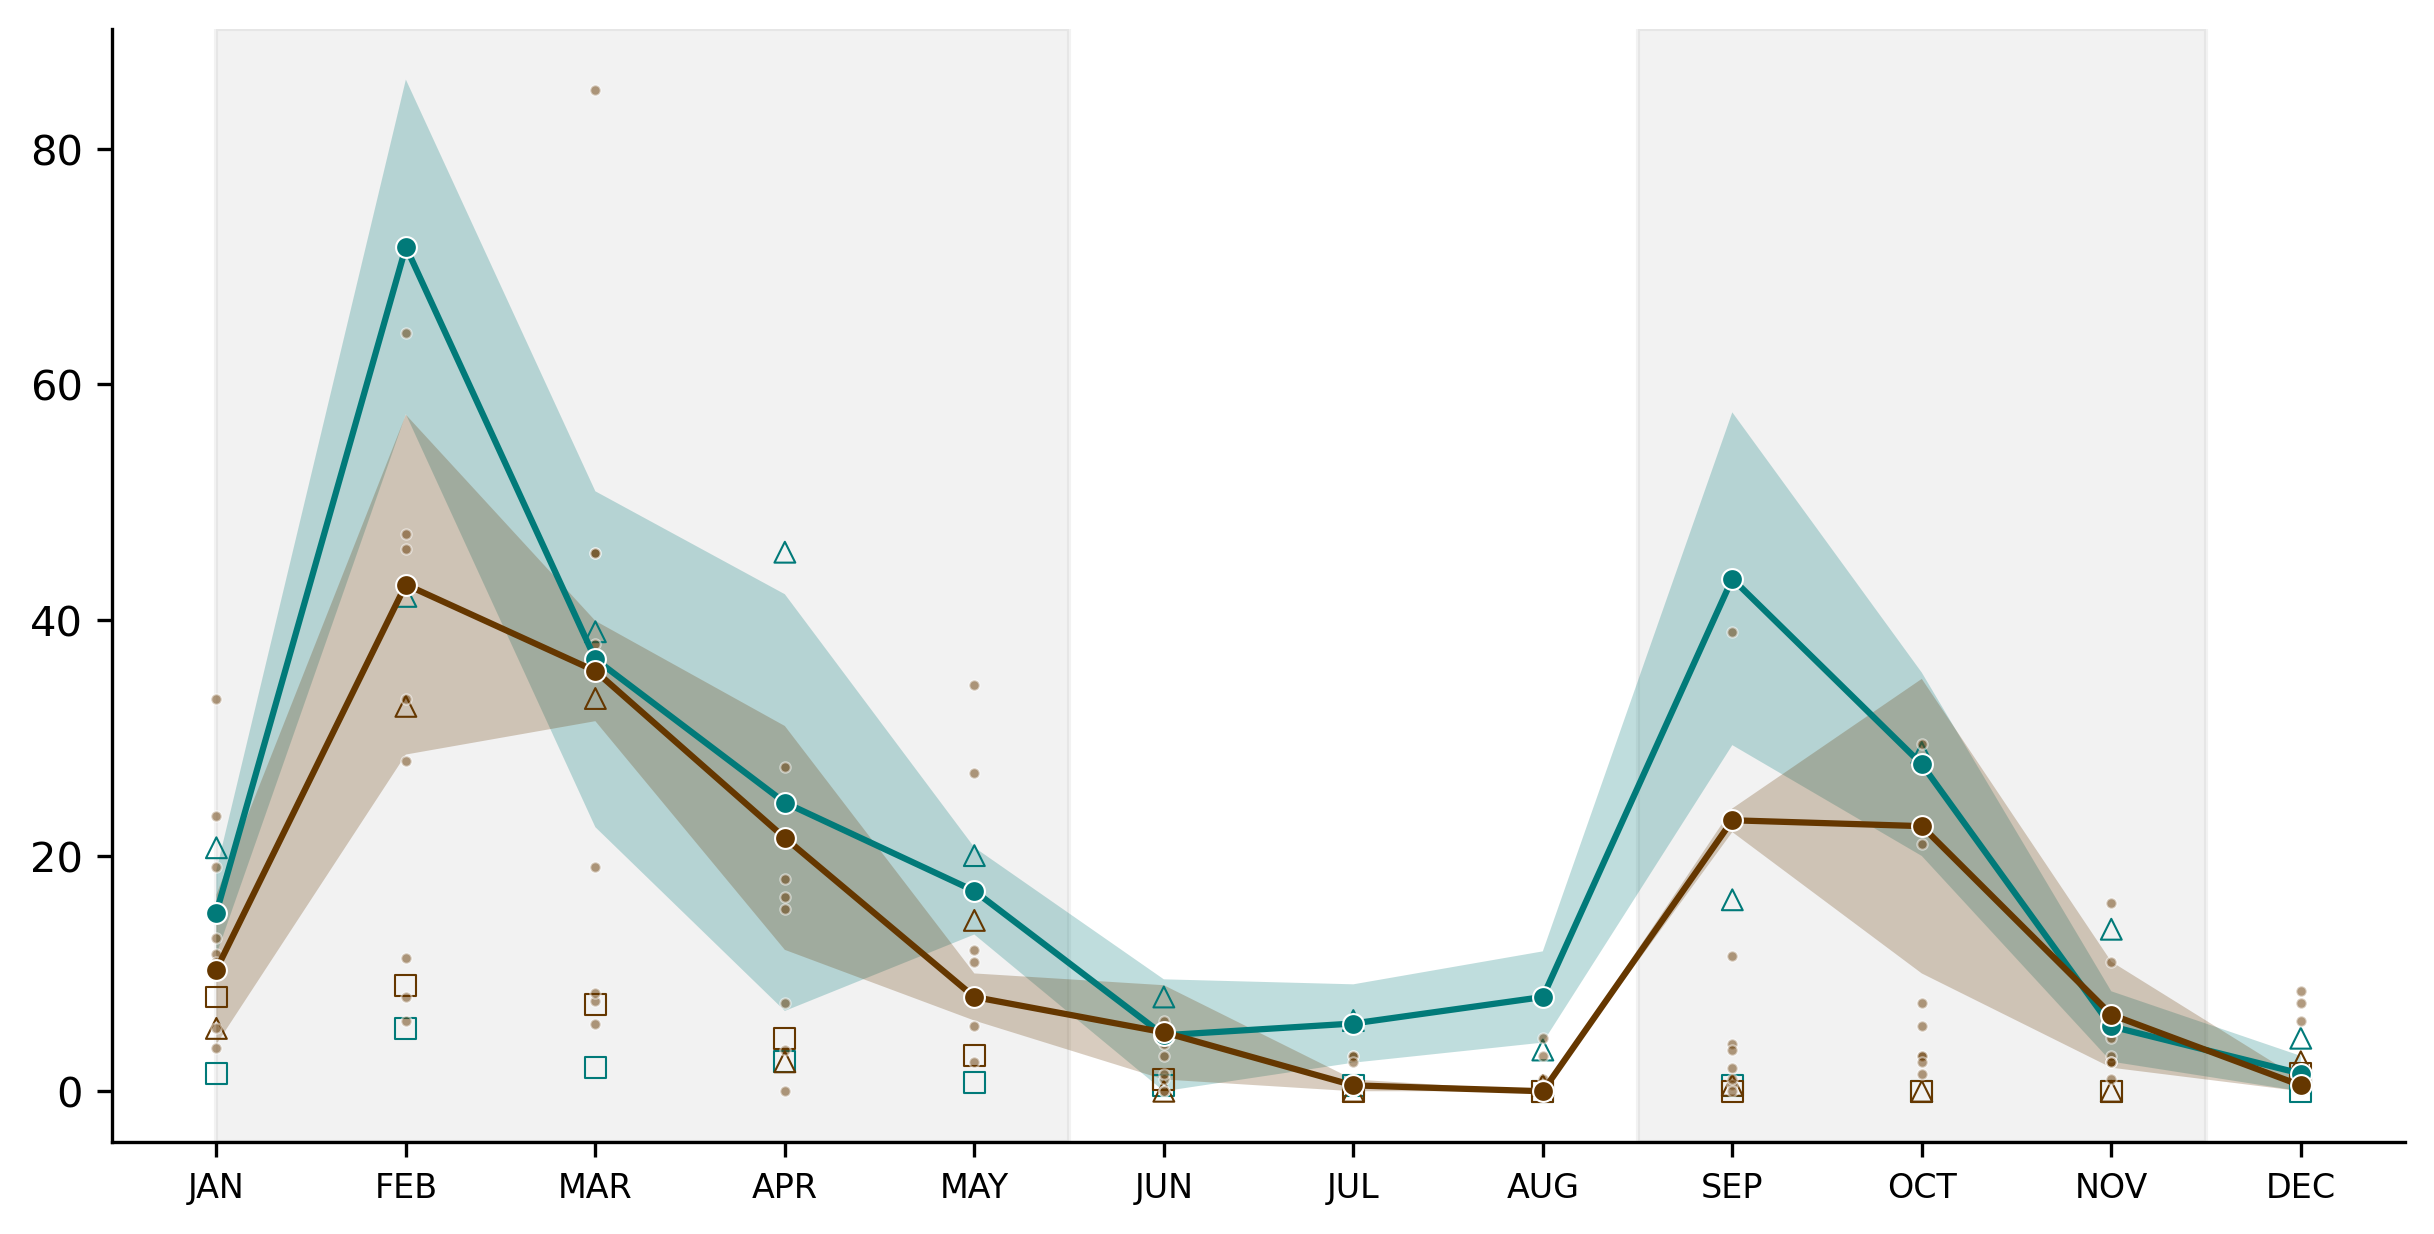

In [134]:
# Intialize the figure and axes.
fig = plt.figure(
    figsize=(8, 4),
    facecolor="white",
    constrained_layout=True,
    dpi=300,
)
ax = fig.add_subplot(111)
# Annotate the fruiting periods.
ax.axvspan(0, 4.5, color="grey", alpha=0.1)
ax.axvspan(7.5, 10.5, color="grey", alpha=0.1)
# Plot san.
ax.plot(
    np.arange(len(month_list)),
    mu_dicc["D. santomea"],
    color="#017a79",
    marker="o",
    markersize=5,
    markeredgewidth=0.5,
    markeredgecolor="white",
)
ax.fill_between(
    np.arange(len(month_list)),
    np.array(mu_dicc["D. santomea"]) - np.array(se_dicc["D. santomea"]),
    np.array(mu_dicc["D. santomea"]) + np.array(se_dicc["D. santomea"]),
    color="#017a79",
    alpha=0.25,
    edgecolor="none",
)
# Plot the endemic fig.
ax.plot(
    np.arange(len(month_list)),
    mu_dicc["Ficus clamydocarpa fernandesiana"],
    color="#653700",
    marker="o",
    markersize=5,
    markeredgewidth=0.5,
    markeredgecolor="white",
)
ax.fill_between(
    np.arange(len(month_list)),
    np.array(mu_dicc["Ficus clamydocarpa fernandesiana"])
    - np.array(se_dicc["Ficus clamydocarpa fernandesiana"]),
    np.array(mu_dicc["Ficus clamydocarpa fernandesiana"])
    + np.array(se_dicc["Ficus clamydocarpa fernandesiana"]),
    color="#653700",
    alpha=0.25,
    edgecolor="none",
)
# For the other droso species.
for dros in [("D. yakuba", "^"), ("F1 Hybrid", "s")]:
    # Unpack the drosophila species and marker.
    spc, mrk = dros
    # Plot the drosophila species.
    ax.scatter(
        np.arange(len(month_list)),
        mu_dicc[spc],
        color="none",
        marker=mrk,
        s=25,
        edgecolor="#017a79",
        linewidth=0.5,
    )
# For the other fig species.
for fig in [("Ficus kamerounesis", "^"), ("Ficus mucoso", "s")]:
    # Unpack the fig species and marker.
    spc, mrk = fig
    # Plot the fig species.
    ax.scatter(
        np.arange(len(month_list)),
        mu_dicc[spc],
        facecolor="none",
        marker=mrk,
        s=25,
        edgecolor="#653700",
        linewidth=0.5,
    )
# For the other fruit species.
for fruit in fruit_list[3:]:
    # Plot the fruit species.
    ax.scatter(
        np.arange(len(month_list)),
        mu_dicc[fruit],
        facecolor="#653700",
        marker=".",
        s=25,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.5,
    )
# Set the x-axis ticks.
ax.set_xticks(np.arange(len(month_list)), labels=month_list, fontsize=8)
# Show the plot.
plt.show()

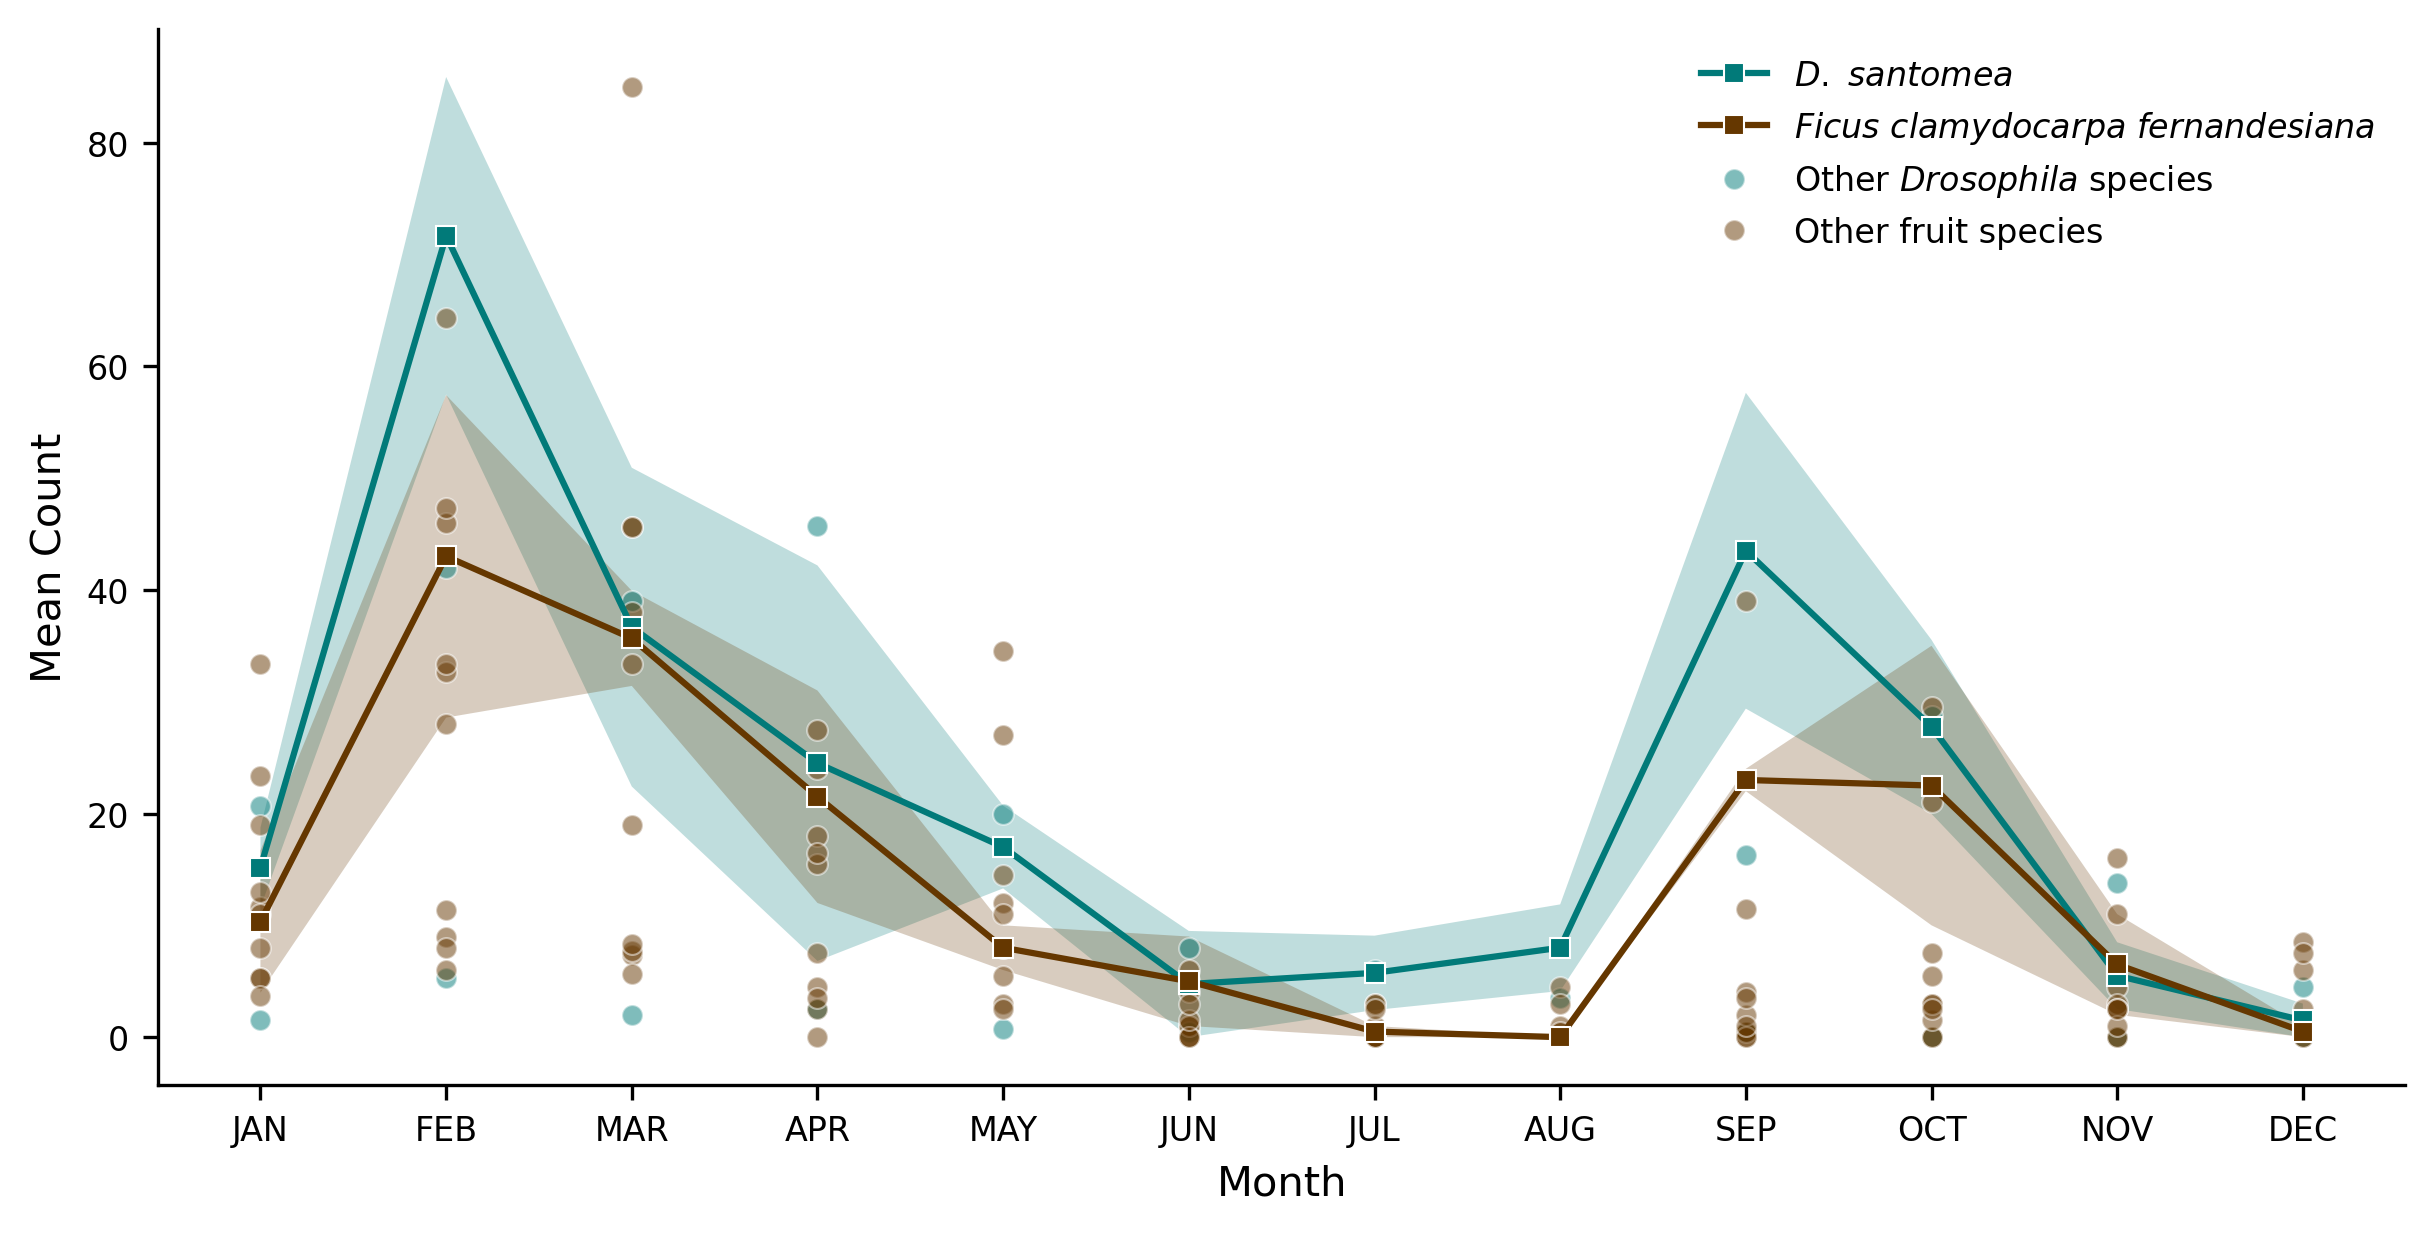

In [135]:
# Intialize the figure and axes.
fig = plt.figure(
    figsize=(8, 4),
    facecolor="white",
    constrained_layout=True,
    dpi=300,
)
ax = fig.add_subplot(111)
# Plot san.
ax.plot(
    np.arange(len(month_list)),
    mu_dicc["D. santomea"],
    color="#017a79",
    marker="s",
    markersize=5,
    markeredgewidth=0.5,
    markeredgecolor="white",
)
ax.fill_between(
    np.arange(len(month_list)),
    np.array(mu_dicc["D. santomea"]) - np.array(se_dicc["D. santomea"]),
    np.array(mu_dicc["D. santomea"]) + np.array(se_dicc["D. santomea"]),
    color="#017a79",
    alpha=0.25,
    edgecolor="none",
)
# Plot the endemic fig.
ax.plot(
    np.arange(len(month_list)),
    mu_dicc["Ficus clamydocarpa fernandesiana"],
    color="#653700",
    marker="s",
    markersize=5,
    markeredgewidth=0.5,
    markeredgecolor="white",
)
ax.fill_between(
    np.arange(len(month_list)),
    np.array(mu_dicc["Ficus clamydocarpa fernandesiana"])
    - np.array(se_dicc["Ficus clamydocarpa fernandesiana"]),
    np.array(mu_dicc["Ficus clamydocarpa fernandesiana"])
    + np.array(se_dicc["Ficus clamydocarpa fernandesiana"]),
    color="#653700",
    alpha=0.25,
    edgecolor="none",
)
# For the other dros species.
for dros in dros_list[1:]:
    # Plot the dros species.
    ax.scatter(
        np.arange(len(month_list)),
        mu_dicc[dros],
        facecolor="#017a79",
        marker="o",
        s=25,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.5,
    )
# For the other fruit species.
for fruit in fruit_list[1:]:
    # Plot the fruit species.
    ax.scatter(
        np.arange(len(month_list)),
        mu_dicc[fruit],
        facecolor="#653700",
        marker="o",
        s=25,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.5,
    )
# Set the x-axis ticks.
ax.set_xticks(np.arange(len(month_list)), labels=month_list, fontsize=8)
# Set the y-tick label size.
ax.tick_params(axis="y", labelsize=8)
# Label the axes.
ax.set_xlabel("Month", fontsize=10)
ax.set_ylabel("Mean Count", fontsize=10)
# Construct the legend elements.
legend_elements = [
    Line2D(
        [0],
        [0],
        color="#017a79",
        marker="s",
        markersize=5,
        markeredgewidth=0.5,
        markeredgecolor="white",
        label=r"$D.$ $santomea$",
    ),
    Line2D(
        [0],
        [0],
        color="#653700",
        marker="s",
        markersize=5,
        markeredgewidth=0.5,
        markeredgecolor="white",
        label=r"$Ficus$ $clamydocarpa$ $fernandesiana$",
    ),
    Line2D(
        [0],
        [0],
        color="#017a79",
        marker="o",
        markersize=5,
        markeredgewidth=0.5,
        markeredgecolor="white",
        linestyle="none",
        alpha=0.5,
        label=r"Other $Drosophila$ species",
    ),
    Line2D(
        [0],
        [0],
        color="#653700",
        marker="o",
        markersize=5,
        markeredgewidth=0.5,
        markeredgecolor="white",
        linestyle="none",
        alpha=0.5,
        label="Other fruit species",
    ),
]
# Add the legend to the plot.
ax.legend(handles=legend_elements, fontsize=8)
# Show the plot.
plt.show()